## Tensorboard Logs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def filter_duplicate_steps(events):
    seen_steps = set()
    filtered = []
    for event in events:
        if event.step not in seen_steps:
            filtered.append(event.value)
            seen_steps.add(event.step)
    return filtered

event_smoe = EventAccumulator('/home/fpt/moeut_training_code/tensorboard/158m/smoe/tensorboard')
event_smoe.Reload()  # Load the events
event_sigmoid = EventAccumulator('/home/fpt/moeut_training_code/tensorboard/158m/sigmoid/tensorboard')
event_sigmoid.Reload()  # Load the events
event_shared = EventAccumulator('/home/fpt/moeut_training_code/tensorboard/158m/shared/tensorboard')
event_shared.Reload()  # Load the events
event_deepseek = EventAccumulator('/home/fpt/moeut_training_code/tensorboard/158m/deepseek/tensorboard')
event_deepseek.Reload()  # Load the events


steps = list(set([event_smoe.Scalars('train/loss')[i].step for i in range(len(event_smoe.Scalars('train/loss')))]))
steps.sort()
steps_validation = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
log_info = {
    "training_loss": {
        "smoe": filter_duplicate_steps(event_smoe.Scalars('train/loss')),
        "sigmoid": filter_duplicate_steps(event_sigmoid.Scalars('train/loss')),
        "shared": filter_duplicate_steps(event_shared.Scalars('train/loss')),
        "deepseek": filter_duplicate_steps(event_deepseek.Scalars('train/loss'))
    },
    "balancing_loss": {
        "smoe": filter_duplicate_steps(event_smoe.Scalars('train/reg_loss/moe')),
        "sigmoid": filter_duplicate_steps(event_sigmoid.Scalars('train/reg_loss/moe')),
        "shared": filter_duplicate_steps(event_shared.Scalars('train/reg_loss/moe')),
        "deepseek": filter_duplicate_steps(event_deepseek.Scalars('train/reg_loss/moe'))
    },
    "validation_loss": {
        "smoe": filter_duplicate_steps(event_smoe.Scalars('validation/val/loss')),
        "sigmoid": filter_duplicate_steps(event_sigmoid.Scalars('validation/val/loss')),
        "shared": filter_duplicate_steps(event_shared.Scalars('validation/val/loss')),
        "deepseek": filter_duplicate_steps(event_deepseek.Scalars('validation/val/loss'))
    }
}

In [14]:
steps = list(set([event_smoe.Scalars('train/loss')[i].step for i in range(len(event_smoe.Scalars('train/loss')))]))
steps.sort()
steps_validation = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
log_info = {
    "training_loss": {
        "smoe": filter_duplicate_steps(event_smoe.Scalars('train/loss')),
        "sigmoid": filter_duplicate_steps(event_sigmoid.Scalars('train/loss')),
        "shared": filter_duplicate_steps(event_shared.Scalars('train/loss')),
        "deepseek": filter_duplicate_steps(event_deepseek.Scalars('train/loss'))
    },
    "balancing_loss": {
        "smoe": filter_duplicate_steps(event_smoe.Scalars('train/reg_loss/moe')),
        "sigmoid": filter_duplicate_steps(event_sigmoid.Scalars('train/reg_loss/moe')),
        "shared": filter_duplicate_steps(event_shared.Scalars('train/reg_loss/moe')),
        "deepseek": filter_duplicate_steps(event_deepseek.Scalars('train/reg_loss/moe'))
    },
    "validation_loss": {
        "smoe": filter_duplicate_steps(event_smoe.Scalars('validation/val/loss')),
        "sigmoid": filter_duplicate_steps(event_sigmoid.Scalars('validation/val/loss')),
        "shared": filter_duplicate_steps(event_shared.Scalars('validation/val/loss')),
        "deepseek": filter_duplicate_steps(event_deepseek.Scalars('validation/val/loss'))
    }
}

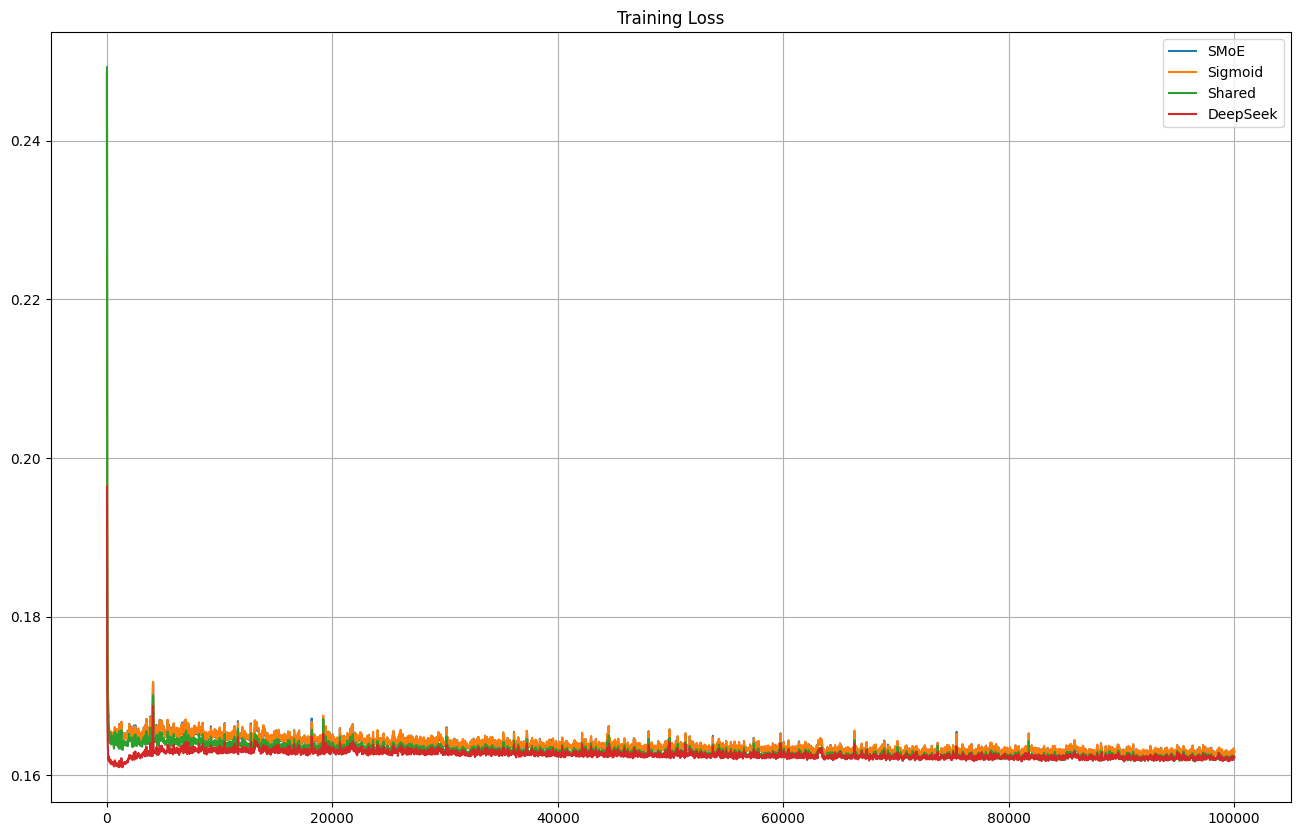

In [20]:
plt.figure(figsize=(16, 10))

plt.plot(steps, log_info['balancing_loss']['smoe'], label='SMoE', alpha=1)
plt.plot(steps, log_info['balancing_loss']['sigmoid'], label='Sigmoid', alpha=1)
plt.plot(steps, log_info['balancing_loss']['shared'], label='Shared', alpha=1)
plt.plot(steps, log_info['balancing_loss']['deepseek'], label='DeepSeek', alpha=1)
plt.title("Training Loss")
plt.grid()
plt.legend()
plt.show()

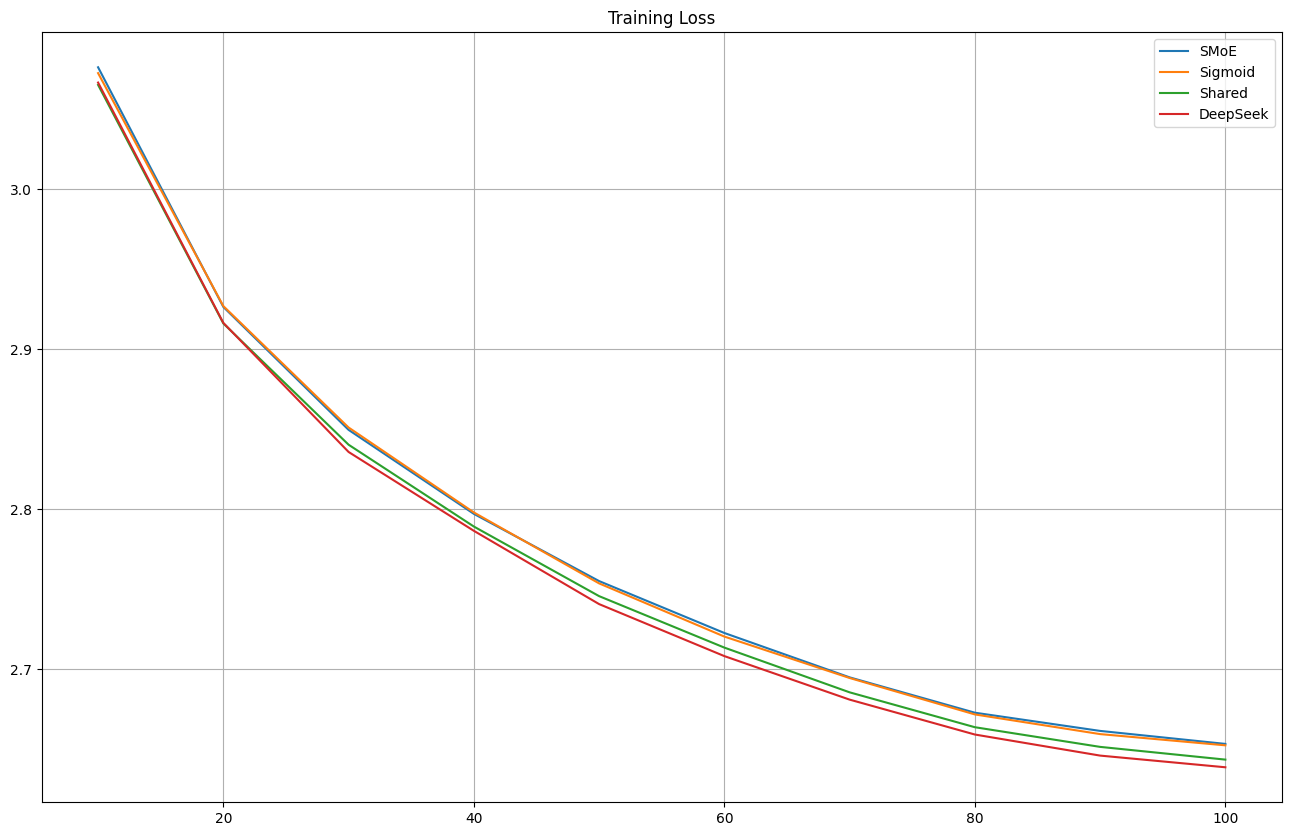

In [15]:
plt.figure(figsize=(16, 10))

plt.plot(steps_validation, log_info['validation_loss']['smoe'], label='SMoE', alpha=1)
plt.plot(steps_validation, log_info['validation_loss']['sigmoid'], label='Sigmoid', alpha=1)
plt.plot(steps_validation, log_info['validation_loss']['shared'], label='Shared', alpha=1)
plt.plot(steps_validation, log_info['validation_loss']['deepseek'], label='DeepSeek', alpha=1)
plt.title("Training Loss")
plt.grid()
plt.legend()
plt.show()

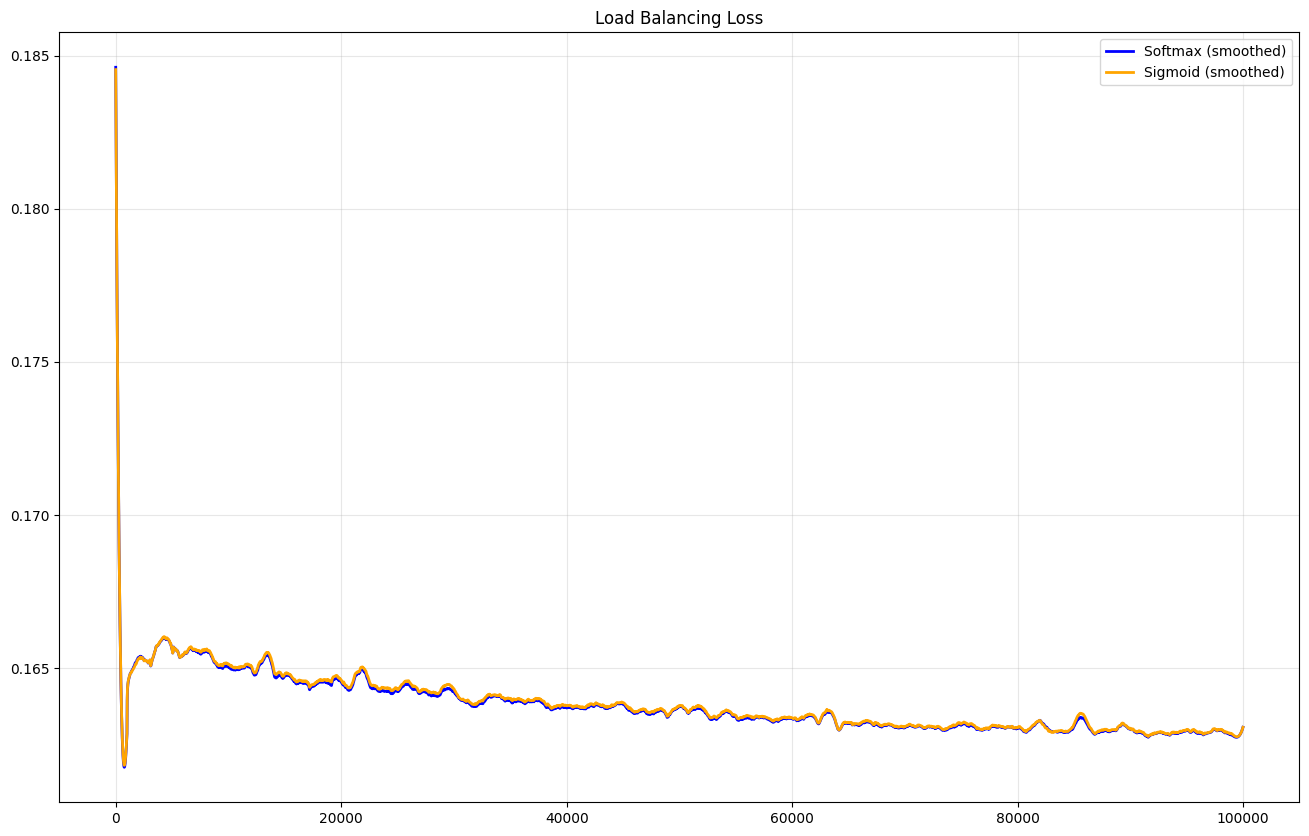

In [66]:
from scipy.signal import savgol_filter

plt.figure(figsize=(16, 10))

# Convert dictionary values to lists for smoothing
x_values = list(values_softmax.keys())
y_softmax = list(values_softmax.values())
y_sigmoid = list(values_sigmoid.values())

# Apply Savitzky-Golay filter for smoothing
# Window length must be odd and less than data length
window = 101  # Adjust this value to control smoothing amount
y_softmax_smooth = savgol_filter(y_softmax, window, 3)
y_sigmoid_smooth = savgol_filter(y_sigmoid, window, 3)

# Plot both original (faint) and smoothed lines
# plt.plot(x_values, y_softmax, alpha=0.2, color='blue', label='Softmax (raw)')
# plt.plot(x_values, y_sigmoid, alpha=0.2, color='orange', label='Sigmoid (raw)')
plt.plot(x_values, y_softmax_smooth, color='blue', label='Softmax (smoothed)', linewidth=2)
plt.plot(x_values, y_sigmoid_smooth, color='orange', label='Sigmoid (smoothed)', linewidth=2)

plt.title("Load Balancing Loss")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

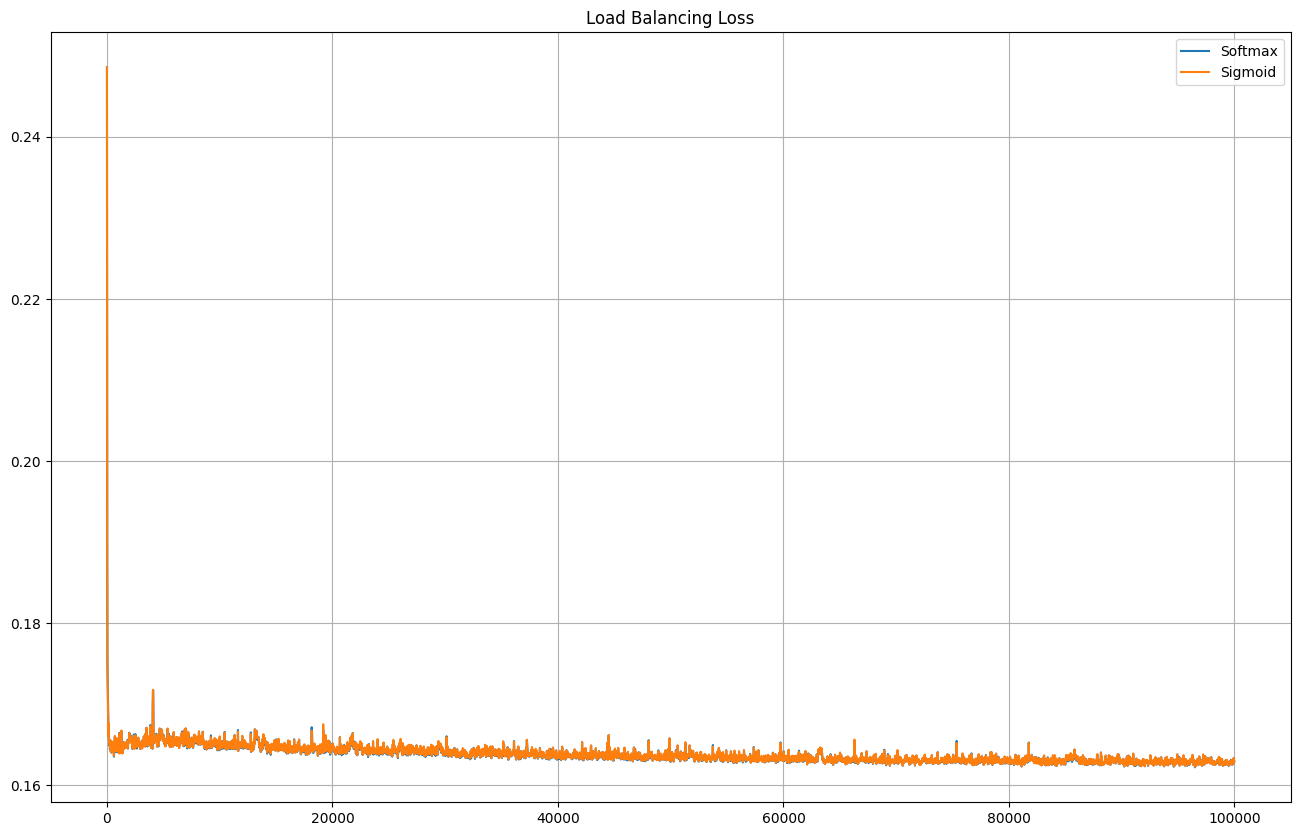

In [52]:
plt.figure(figsize=(16, 10))

plt.plot(values_softmax.keys(), values_softmax.values(), label='Softmax')
plt.plot(values_softmax.keys(), values_sigmoid.values(), label='Sigmoid')

plt.title("Load Balancing Loss")
plt.grid()
plt.legend()  # Add this line to show the legend
plt.show()

### Test checkpoints

In [2]:
import numpy as np

np.load("/home/fpt/moeut_training_code/paper/deepseek/router_saturation_679M/smoe/model-60000.npy")

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.0941067 , 0.10167789],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.15945585, 0.        ],
        [0.10725054, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.18879355, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.17651786, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.1414402 , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [9]:
import torch
checkpoint = torch.load("/cm/shared/anonymous/moeut_training_code/save/test/checkpoint/model-200.pth")

In [10]:
num_params = 0
num_active_params = 0

for key in list(checkpoint['model'].keys()):
    num_params += checkpoint['model'][key].numel()

    if "pkm.keys" in key or "pkm.values" in key:
        num_active_params += int(checkpoint['model'][key].numel() / 8)
    else:
        num_active_params += checkpoint['model'][key].numel()

for key in list(checkpoint['model'].keys())[:20]:
    print(f"{key:50}, {checkpoint['model'][key].numel()}")

print("\nNumber of parameters: ", num_params)
print("\nNumber of activated parameters: ", num_active_params)

embedding.weight                                  , 4096000
unique_layers.0.self_attn.data_to_kv.weight       , 335872
unique_layers.0.self_attn.data_to_q.weight        , 167936
unique_layers.0.self_attn.out_proj.weight         , 167936
unique_layers.0.pkm.keys                          , 4194304
unique_layers.0.pkm.keys_shared                   , 131072
unique_layers.0.pkm.values                        , 4194304
unique_layers.0.pkm.values_shared                 , 131072
unique_layers.0.pkm.expert_sel                    , 32768
unique_layers.0.pkm.film_ensemble                 , 512
unique_layers.0.pkm.iter                          , 1
unique_layers.0.pkm.kv_sel_counts_100             , 8192
unique_layers.0.norm1.weight                      , 512
unique_layers.0.norm1.bias                        , 512
unique_layers.0.norm2.weight                      , 512
unique_layers.0.norm2.bias                        , 512
unique_layers.1.self_attn.data_to_kv.weight       , 335872
unique_layers.1.s

In [11]:
checkpoint_200 = checkpoint['model']["unique_layers.0.pkm.film_ensemble"]

In [8]:
checkpoint_100 = checkpoint['model']["unique_layers.0.pkm.film_ensemble"]

In [13]:
print(checkpoint_100[:100])
print(checkpoint_200[:100])

tensor([ 0.0776,  0.0894, -0.0498, -0.0271, -0.0560, -0.0539, -0.1156,  0.0390,
         0.0356, -0.1175, -0.0535, -0.0744,  0.0325, -0.1061,  0.1084,  0.0546,
         0.0848,  0.0511,  0.0278,  0.0456,  0.0736, -0.0628,  0.0434,  0.0683,
        -0.0896,  0.0322, -0.0284, -0.0388,  0.0733, -0.0728, -0.0266,  0.1216,
        -0.0294, -0.0294,  0.0522,  0.0524, -0.0662,  0.0844,  0.0249,  0.0352,
         0.0424,  0.0710,  0.0596,  0.0294, -0.0436, -0.0963,  0.0519,  0.0263,
         0.0241, -0.0880, -0.0408, -0.0570, -0.0460,  0.0793, -0.1137, -0.0258,
        -0.0708, -0.0639, -0.0427, -0.1004, -0.0326,  0.0732, -0.0270, -0.0551,
        -0.0369, -0.1467, -0.0490, -0.0801,  0.0571,  0.0245, -0.0334,  0.0414,
         0.0707, -0.0534, -0.0505,  0.0514,  0.1312,  0.0958,  0.0439,  0.0378,
        -0.0645, -0.1135,  0.0879,  0.0963,  0.0739, -0.0973,  0.0708, -0.0424,
        -0.0497,  0.0871,  0.0258,  0.0556,  0.1494,  0.0518,  0.0607,  0.0419,
         0.0627,  0.0702,  0.0645, -0.07

### Extract result from result json files

In [1]:
import pandas as pd
import json
import numpy as np
import os
import glob

In [4]:
result_dir = "/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only/export"
all_json_files = glob.glob(os.path.join(result_dir, "*.json"))
all_json_files = sorted(all_json_files, key=lambda x: int(x.split('-')[-1].split('.')[0]))
all_json_files

['/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only/export/result-model-20000.pth.json',
 '/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only/export/result-model-40000.pth.json',
 '/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only/export/result-model-60000.pth.json',
 '/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only/export/result-model-80000.pth.json',
 '/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only/export/result-model-100000.pth.json',
 '/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only/export/result-model-120000.pth.json',
 '/cm/archive/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_660M_standardlb_deepseek_shared_only

In [5]:
fields = [
    "val/perplexity",
    "lambada/accuracy/total",
    "blimp/accuracy/seq_average",
    "cbt/accuracy/seq_average",
    "hellaswag/accuracy/seq_average",
    "piqa/accuracy/seq_average",
    "ai2arc/accuracy/ARC-Easy",
    "ai2arc/accuracy/ARC-Challenge",
    "mmlu/accuracy/seq_average",
    "openbookqa/accuracy/seq_average",
    "race/accuracy/group_average",
    "siqa/accuracy/seq_average",
    "winogrande/accuracy/seq_average",
    "commonsenseqa/accuracy/seq_average"
]
result_list = []

for file_path in all_json_files:
    # print(file_path)
    file_name = os.path.basename(file_path)
    with open(file_path) as f:
        result_data = json.load(f)

    result_table_item = {}
    result_table_item["model_name"] = file_name
    for field in fields:
        try:
            result_table_item[field] = result_data[field]
        except:
            result_table_item[field] = None

    result_list.append(result_table_item)

result_table = pd.DataFrame.from_dict(result_list, orient='columns')
result_table

,model_name,val/perplexity,lambada/accuracy/total,blimp/accuracy/seq_average,cbt/accuracy/seq_average,hellaswag/accuracy/seq_average,piqa/accuracy/seq_average,ai2arc/accuracy/ARC-Easy,ai2arc/accuracy/ARC-Challenge,mmlu/accuracy/seq_average,openbookqa/accuracy/seq_average,race/accuracy/group_average,siqa/accuracy/seq_average,winogrande/accuracy/seq_average,commonsenseqa/accuracy/seq_average
0,result-model-20000.pth.json,15.209507,0.218362,0.749358,0.832633,0.289185,0.575082,0.325159,0.209442,0.260994,0.248,0.301823,0.362334,0.505130,0.253890
1,result-model-40000.pth.json,13.264641,0.284356,0.771687,0.852541,0.299243,0.600109,0.339112,0.208584,0.259635,0.296,0.306511,0.364381,0.510655,0.248976
2,result-model-60000.pth.json,12.429460,0.271351,0.786642,0.865646,0.314380,0.600653,0.355180,0.228326,0.261923,0.282,0.314101,0.377687,0.510655,0.260442
3,result-model-80000.pth.json,11.896154,0.278339,0.785896,0.870148,0.320554,0.601741,0.348837,0.227468,0.261494,0.296,0.315960,0.358751,0.513023,0.253071
4,result-model-100000.pth.json,11.523392,0.315994,0.796522,0.869448,0.325334,0.619695,0.357294,0.224893,0.259564,0.286,0.316880,0.362845,0.509077,0.262899
5,result-model-120000.pth.json,11.234445,0.336180,0.799373,0.874850,0.331408,0.622416,0.358562,0.230043,0.261280,0.294,0.318925,0.359775,0.512234,0.266994
6,result-model-140000.pth.json,11.003112,0.317935,0.802299,0.881753,0.334993,0.620783,0.363636,0.227468,0.263854,0.306,0.323631,0.358751,0.512234,0.271908
7,result-model-160000.pth.json,10.819102,0.318905,0.803925,0.881353,0.336487,0.617519,0.374207,0.229185,0.265141,0.282,0.323997,0.367963,0.520916,0.266994
8,result-model-180000.pth.json,10.591581,0.352679,0.798716,0.884754,0.346146,0.629489,0.368288,0.236910,0.260922,0.290,0.320633,0.369498,0.501973,0.266994
9,result-model-200000.pth.json,10.440212,0.337733,0.805000,0.887255,0.348337,0.628400,0.370402,0.244635,0.261065,0.294,0.320541,0.372057,0.513023,0.274365


In [6]:
import numpy as np

### Merge the results from different json files into one

In [65]:
import json

In [66]:
def merge_json(file1_path, file2_path):
    with open(file1_path) as f:
        result_data1 = json.load(f)
    with open(file2_path) as f:
        result_data2 = json.load(f)

    # merge data of result_data2 to result_data1 (except for the fields that are already in result_data1), but still update 'cbt' fields
    for key, value in result_data2.items():
        if key in result_data1.keys():
            if "cbt" in key:
                result_data1[key] = value
            else:
                continue
        else:
            result_data1[key] = value

    # save the merged data to a new file
    with open(file1_path, "w") as f:
        json.dump(result_data1, f)

    print(f"Merge {file1_path} successfully!")

# test the function
# file1_path = "/home/fpt/moeut_training_code/paper/deepseek/result/result-model-10000.pth-1.json"
# file2_path = "/home/fpt/moeut_training_code/paper/deepseek/result/result-model-10000.pth-2.json"
# merge_json(file1_path, file2_path)

In [70]:
foler_result_1 = "/cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export"
foler_result_2 = "/cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/tmp"

# loop through all files in folder_result_2 and merge them to the corresponding files in folder_result_1
for file_name in os.listdir(foler_result_2):
    file1_path = os.path.join(foler_result_1, file_name)
    file2_path = os.path.join(foler_result_2, file_name)
    merge_json(file1_path, file2_path)

Merge /cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export/result-model-40000.pth.json successfully!
Merge /cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export/result-model-90000.pth.json successfully!
Merge /cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export/result-model-30000.pth.json successfully!
Merge /cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export/result-model-50000.pth.json successfully!
Merge /cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export/result-model-70000.pth.json successfully!
Merge /cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export/result-model-80000.pth.json successfully!
Merge /cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_standard_lb/export/result-model-20000.pth.json successfully!

## TMP

In [18]:
import json

In [51]:
with open("/cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_sigmoid_standard_lb/tmp/result-model-90000.pth.json") as f:
    data = json.load(f)

In [53]:
data["cbt/accuracy/seq_average"]

0.847639055622249

In [34]:
data['Data'][0]

{'Answer': {'Aliases': ['David Seville'],
  'MatchedWikiEntityName': 'David Seville',
  'NormalizedAliases': ['david seville'],
  'NormalizedMatchedWikiEntityName': 'david seville',
  'NormalizedValue': 'david seville',
  'Type': 'WikipediaEntity',
  'Value': 'David Seville'},
 'EntityPages': [],
 'Question': 'Who was the man behind The Chipmunks?',
 'QuestionId': 'tc_2',
 'QuestionSource': 'http://www.triviacountry.com/',
 'SearchResults': [{'Description': "Alice Cooper's The Man Behind the Mask Music Video. Chipmunk styled",
   'DisplayUrl': 'www.youtube.com/watch?v=EFme-4S6l3Y',
   'Rank': 0,
   'Title': 'The Man Behind the Mask (Chipmunk Version) - YouTube',
   'Url': 'http://www.youtube.com/watch?v=EFme-4S6l3Y'},
  {'Description': 'Listen to all the actors who have voiced the following Alvin & The Chipmunks characters ... One Punch Man. 3. Steven ... Inyxception Enterprises, Inc. DBA Behind The ...',
   'DisplayUrl': 'www.behindthevoiceactors.com/tv-shows/Alvin-and-The-Chipmunks',

## Analyze DeepSeek

In [1]:
import torch

In [2]:
checkpoint = torch.load("/cm/shared/anonymous/moeut_training_code/save/slimpajama_moe_no_attmoe_154M_deepseek/checkpoint/model-100000.pth")

In [10]:
for key in list(checkpoint['model'].keys())[:16]:
    print(f"{key:50}, {checkpoint['model'][key].numel()}")

embedding.weight                                  , 4096000
unique_layers.0.self_attn.data_to_kv.weight       , 335872
unique_layers.0.self_attn.data_to_q.weight        , 167936
unique_layers.0.self_attn.out_proj.weight         , 167936
unique_layers.0.pkm.keys                          , 4194304
unique_layers.0.pkm.keys_shared                   , 131072
unique_layers.0.pkm.values                        , 4194304
unique_layers.0.pkm.values_shared                 , 131072
unique_layers.0.pkm.expert_sel                    , 32768
unique_layers.0.pkm.e_score_correction_bias       , 64
unique_layers.0.pkm.iter                          , 1
unique_layers.0.pkm.kv_sel_counts_100             , 8192
unique_layers.0.norm1.weight                      , 512
unique_layers.0.norm1.bias                        , 512
unique_layers.0.norm2.weight                      , 512
unique_layers.0.norm2.bias                        , 512


In [12]:
checkpoint['model']['unique_layers.1.pkm.e_score_correction_bias']

tensor([0.7770, 0.7730, 0.7710, 0.7710, 0.7700, 0.9950, 0.9420, 0.7880, 0.8540,
        0.8940, 0.7870, 0.7740, 0.8000, 0.8310, 0.7950, 0.8630, 0.8750, 0.8070,
        0.8860, 0.7920, 0.8320, 0.8150, 0.9440, 0.7960, 0.8200, 0.7950, 0.8210,
        0.8230, 0.8190, 0.8280, 0.8320, 0.8110, 0.8120, 0.8160, 0.7770, 0.7880,
        0.7880, 0.9340, 0.7850, 0.8160, 0.8110, 0.9650, 0.7980, 0.9370, 0.8900,
        0.7690, 0.9010, 0.7870, 0.9210, 0.9880, 0.9050, 0.9130, 0.8030, 0.9090,
        0.7720, 0.8400, 0.7740, 0.9440, 0.9680, 0.8080, 0.8520, 0.8000, 0.9060,
        0.7950], device='cuda:0')

In [1]:
import pandas as pd

In [6]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet("/cm/shared/anonymous/moeut_training_code/cache/SQUADCompletionTest/validation-00000-of-00001.parquet")

# Write to JSON Lines format
df.to_json("/cm/shared/anonymous/moeut_training_code/cache/SQUADCompletionTest/data/squad_validation.jsonl", orient='records', lines=True)

In [2]:
import json

def _convert_to_jsonl(json_file: str, jsonl_file: str):
    """Convert SQuAD JSON to JSONL format"""
    try:
        with open(json_file, 'r') as f:
            squad_data = json.load(f)

        examples = []
        for article in squad_data['data']:
            for paragraph in article['paragraphs']:
                context = paragraph['context']
                for qa in paragraph['qas']:
                    examples.append({
                        'id': qa['id'],
                        'context': context,
                        'question': qa['question'],
                        'answers': qa['answers']
                    })

        with open(jsonl_file, 'w') as f:
            for example in examples:
                f.write(json.dumps(example) + '\n')

    except Exception as e:
        print(f"Error converting SQuAD format: {e}")

_convert_to_jsonl(
    "/home/fpt/moeut_training_code/cache/SQUAD/data/dev-v1.1.json",
    "/home/fpt/moeut_training_code/cache/SQUAD/data/dev-v1.1.jsonl"
)

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("/cm/shared/anonymous/moeut_training_code/cache/MMLU/test/abstract_algebra_test.csv")
df.head(2)

,"Find the degree for the given field extension Q(sqrt(2), sqrt(3), sqrt(18)) over Q.",0,4,2,6,B
0,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C
1,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D


In [10]:
list(df.iloc[0])

['Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the index of <p> in S_5.',
 '8',
 '2',
 '24',
 '120',
 'C']

In [12]:
import json

with open("/cm/shared/anonymous/moeut_training_code/cache/RACE/RACE/test/high/321.txt", "r", encoding="utf-8") as f:
    data = json.load(f)
data

{'answers': ['A', 'D', 'D'],
 'options': [["puts emphasis on people's thoughts",
   'needs people to be rich in knowledge',
   "stresses more about people's identity",
   'allows people to discuss politics secretly'],
  ['what is said online is under control of the Internet',
   "it is hard to protect the other's identity",
   'the faceless communication is exciting',
   'one may not show the real self in cyberspace'],
  ['the Internet allows people to get more information about their loved ones',
   'the Internet makes it easy for people to imagine how others view them',
   'people usually get to know each other by chance through the Internet',
   'people may be disappointed when they meet in person']],
 'questions': ['According to the passage, chatting in the cyberspace   _  .',
  'People who are against online love think   _  .',
  'By saying "With so many unknowns, it\'s easy to let one\'s imagination \'fill in the blanks\'", the writer means that   _  .'],
 'article': 'Cyberspace,

## Test ARC-Challenge

In [2]:
import numpy as np
import json
import pandas as pd

In [30]:
df_arc = pd.read_csv("/home/fpt/moeut_training_code/cache/AI2ARC/ARC-V1-Feb2018-2/ARC-Challenge/ARC-Challenge-Test.csv")
df_arc = df_arc[df_arc["AnswerKey"].isin(["A", "B", "C", "D"])]
df_arc.head(5)

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,schoolGrade,year,question,subject,category
0,Mercury_7175875,7175875,1,C,1,0,Mercury,9,2015,An astronomer observes that a planet rotates f...,NaN,Test
1,Mercury_SC_409171,409171,1,B,1,0,Mercury,5,2015,A group of engineers wanted to know how differ...,NaN,Test
2,Mercury_SC_408547,408547,1,C,1,0,Mercury,5,2015,The end result in the process of photosynthesi...,NaN,Test
3,Mercury_407327,407327,1,D,1,0,Mercury,8,2015,A physicist wants to determine the speed a car...,NaN,Test
4,MCAS_2006_9_44,44,1,D,1,0,MCAS,9,2006,An astronaut drops a 1.0 kg object and a 5.0 k...,NaN,Test


In [31]:
count_anwer_key = df_arc["AnswerKey"].value_counts()
count_anwer_key

AnswerKey
C    303
B    301
D    283
A    263
Name: count, dtype: int64

In [33]:
int(df_arc['AnswerKey'][0] - 'A')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [1]:
import numpy as np

In [2]:
# load /home/fpt/moeut_training_code/cache/Winogrande/winogrande_1.1/dev-labels.lst

with open("/home/fpt/moeut_training_code/cache/Winogrande/winogrande_1.1/dev-labels.lst", "r") as f:
    labels = f.read().splitlines()
    
# statistics of labels
np.unique(labels, return_counts=True)

(array(['1', '2'], dtype='<U1'), array([628, 639]))